In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

In [35]:
# Load the letter recognition dataset
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
file = "letter-recognition.data"
column_names = ['letter'] + [f'f{i}' for i in range(1, 17)]
df = pd.read_csv(file, header=None, names=column_names)

In [36]:
df.head()

,letter,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [8]:
df.shape

(20000, 17)

In [14]:
# Features and Labels
X = df.iloc[:, 1:].values  # 16 features
y = df['letter'].values    # labels A-Z


In [16]:
#Label Encoding ('A' → 0, 'B' → 1, ...)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot Encoding
y_categorical = to_categorical(y_encoded, num_classes=26)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [22]:
# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(16,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))  # 26 classes → softmax

In [23]:
# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Train
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1413 - loss: 3.1817 - val_accuracy: 0.4928 - val_loss: 1.8588
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5613 - loss: 1.6311 - val_accuracy: 0.6447 - val_loss: 1.2925
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6791 - loss: 1.1844 - val_accuracy: 0.7078 - val_loss: 1.0891
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7278 - loss: 1.0220 - val_accuracy: 0.7350 - val_loss: 0.9934
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7500 - loss: 0.9206 - val_accuracy: 0.7600 - val_loss: 0.9051
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7775 - loss: 0.8136 - val_accuracy: 0.7619 - val_loss: 0.8751
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7813 - loss: 0.7944 - val_accuracy: 0.7822 - val_loss: 0.7987
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7995 - loss: 0.7292 - val_accuracy: 0.

In [25]:
# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc*100:.2f}%")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8697 - loss: 0.4452

Test Accuracy: 86.75%


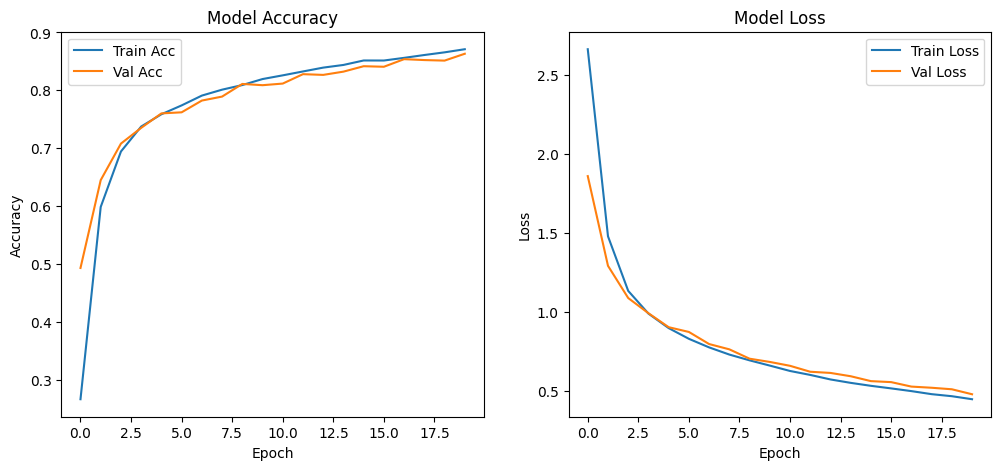

In [28]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
# Sample Predictions
y_preds = model.predict(X_test[:10])
y_classes = np.argmax(y_preds, axis=1)
y_actual = np.argmax(y_test[:10], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [33]:
print(f"\n{'Sample':<10} {'Predicted':<10} {'Actual ':<10}")
print("-" * 30)
for i in range(10):
    pred_label = label_encoder.inverse_transform([y_classes[i]])[0]
    actual_label = label_encoder.inverse_transform([y_actual[i]])[0]
    print(f"{i+1:<10} {pred_label:<10} {actual_label:<10}")


Sample     Predicted  Actual    
------------------------------
1          Z          T         
2          L          L         
3          A          A         
4          E          E         
5          Q          Q         
6          E          E         
7          O          O         
8          Q          Q         
9          G          G         
10         O          O         
